Member Team:
1. Arrafi'atu Arsy Almas       (101320068)
2. Kemal Reviansyah Hermawanto (101320118)

https://github.com/mardani72/Facies-Classification-Machine-Learning/blob/master/Facies_Classification_Various_ML_Final.ipynb

* **GR**: this wireline logging tools measure gamma emission from formation. Good index for shale content
* **ILD_LOG10**: this is resistivity measurment which is applicable for identification of reservoir fluid content
* **PE**: photoelectric effect log can be used for lithology (mineral contet of rock) identificaiton
* **DPHI**: Phi is porosity index in petrophysics. To measure porosity, there serval methods such as neutron and density. This is differences between them
* **PNHIND**: Average of neutron and density log
* **NM_M**:nonmarine-marine indicator
* **RELPOS**: relative position

Description of 9 discrete facies
1. **(SS)** Nonmarine sandstone
2. **(CSiS)** Nonmarine coarse siltstone
3. **(FSiS)** Nonmarine fine siltstone
4. **(SiSH)** Marine siltstone and shale
5. **(MS)** Mudstone (limestone)
6. **(WS)** Wackestone (limestone)
7. **(D)** Dolomite
8. **(PS)** Packstone-grainstone (limestone)
9. **(BS)** Phylloid-algal bafflestone (limestone)

## Dataset

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# create dataset and display
dataset = pd.read_csv('facies_vectors.csv')
dataset

,FACIES,FORMATION,WELL,DEPTH,GR,ILD_LOG10,DPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.450,0.664,9.900,11.915,4.600,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.260,0.661,14.200,12.565,4.100,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.050,0.658,14.800,13.050,3.600,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.100,0.655,13.900,13.115,3.500,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.580,0.647,13.500,13.300,3.400,1,0.915
...,...,...,...,...,...,...,...,...,...,...,...
4144,5,C LM,CHURCHMAN BIBLE,3120.5,46.719,0.947,1.828,7.254,3.617,2,0.685
4145,5,C LM,CHURCHMAN BIBLE,3121.0,44.563,0.953,2.241,8.013,3.344,2,0.677
4146,5,C LM,CHURCHMAN BIBLE,3121.5,49.719,0.964,2.925,8.013,3.190,2,0.669
4147,5,C LM,CHURCHMAN BIBLE,3122.0,51.469,0.965,3.083,7.708,3.152,2,0.661


In [3]:
# describe statistical information of dataset
dataset.describe()

,FACIES,DEPTH,GR,ILD_LOG10,DPHI,PHIND,PE,NM_M,RELPOS
count,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,4149.000000,3232.000000,4149.000000,4149.000000
mean,4.503254,2906.867438,64.933985,0.659566,4.402484,13.201066,3.725014,1.518438,0.521852
std,2.474324,133.300164,30.302530,0.252703,5.274947,7.132846,0.896152,0.499720,0.286644
min,1.000000,2573.500000,10.149000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.000000
25%,2.000000,2821.500000,44.730000,0.498000,1.600000,8.500000,3.100000,1.000000,0.277000
50%,4.000000,2932.500000,64.990000,0.639000,4.300000,12.020000,3.551500,2.000000,0.528000
75%,6.000000,3007.000000,79.438000,0.822000,7.500000,16.050000,4.300000,2.000000,0.769000
max,9.000000,3138.000000,361.150000,1.800000,19.312000,84.400000,8.094000,2.000000,1.000000


In [4]:
# determine value counts for categorical and labeled integer feature (i.e., well, formation, marker, facies)
dataset['WELL'].value_counts()

CROSS H CATTLE     501
SHRIMPLIN          471
ALEXANDER D        466
NEWBY              463
LUKE G U           461
SHANKLE            449
KIMZEY A           439
NOLAN              415
CHURCHMAN BIBLE    404
Recruit F9          80
Name: WELL, dtype: int64

In [5]:
dataset.columns

Index(['FACIES', 'FORMATION', 'WELL', 'DEPTH', 'GR', 'ILD_LOG10', 'DPHI',
       'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

In [6]:
dataset['FACIES'].value_counts()

2    940
3    780
8    686
6    582
5    296
4    271
1    268
9    185
7    141
Name: FACIES, dtype: int64

In [7]:
dataset['FORMATION'].value_counts()

C LM     662
A1 LM    591
A1 SH    422
C SH     392
B5 LM    362
B1 SH    335
B3 SH    270
B4 SH    259
B2 SH    212
B1 LM    210
B2 LM    176
B5 SH     96
B4 LM     88
B3 LM     74
Name: FORMATION, dtype: int64

In [8]:
dataset['NM_M'].value_counts()

2    2151
1    1998
Name: NM_M, dtype: int64

In [9]:
dataset.dtypes

FACIES         int64
FORMATION     object
WELL          object
DEPTH        float64
GR           float64
ILD_LOG10    float64
DPHI         float64
PHIND        float64
PE           float64
NM_M           int64
RELPOS       float64
dtype: object

Change into categorical data

In [10]:
# change well and formation into categorical data

dataset['WELL'] = dataset['WELL'].astype('category')
dataset['FORMATION'] = dataset['FORMATION'].astype('category')

dataset.dtypes

FACIES          int64
FORMATION    category
WELL         category
DEPTH         float64
GR            float64
ILD_LOG10     float64
DPHI          float64
PHIND         float64
PE            float64
NM_M            int64
RELPOS        float64
dtype: object

Remove data points that don't have a valid PE entry

In [11]:
# remove data point that doesn't have a valid PE entry

PE_mask = dataset['PE'].notnull().values
dataset = dataset[PE_mask]

In [12]:
# describe dataset after cleanup

dataset.describe()

,FACIES,DEPTH,GR,ILD_LOG10,DPHI,PHIND,PE,NM_M,RELPOS
count,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000,3232.000000
mean,4.422030,2875.824567,66.135769,0.642719,3.559642,13.483213,3.725014,1.498453,0.520287
std,2.504243,131.006274,30.854826,0.241845,5.228948,7.698980,0.896152,0.500075,0.286792
min,1.000000,2573.500000,13.250000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2791.000000,46.918750,0.492750,1.163750,8.346750,3.100000,1.000000,0.273000
50%,4.000000,2893.500000,65.721500,0.624437,3.500000,12.150000,3.551500,1.000000,0.526000
75%,6.000000,2980.000000,79.626250,0.812735,6.432500,16.453750,4.300000,2.000000,0.767250
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


Remove a single well (named NOLAN) to use as blind test later

In [13]:
blind_dataset = dataset[dataset['WELL'] == 'NOLAN']
training_dataset = dataset[dataset['WELL'] != 'NOLAN']

In [14]:
training_dataset.describe()

,FACIES,DEPTH,GR,ILD_LOG10,DPHI,PHIND,PE,NM_M,RELPOS
count,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000,2817.000000
mean,4.389421,2863.865815,65.758900,0.650132,3.622337,13.672645,3.705430,1.494143,0.516056
std,2.512455,134.346582,30.556841,0.245490,5.520167,8.017761,0.897332,0.500054,0.286780
min,1.000000,2573.500000,13.280000,-0.025949,-21.832000,0.550000,0.200000,1.000000,0.010000
25%,2.000000,2769.500000,47.110000,0.493000,1.100000,8.350000,3.100000,1.000000,0.268000
50%,3.000000,2872.500000,65.156000,0.630021,3.600000,12.170000,3.533000,1.000000,0.517000
75%,6.000000,2972.500000,78.950000,0.824000,6.800000,16.650000,4.300000,2.000000,0.765000
max,9.000000,3122.500000,361.150000,1.480000,18.600000,84.400000,8.094000,2.000000,1.000000


In [15]:
training_dataset['WELL'].value_counts()

CROSS H CATTLE     501
SHRIMPLIN          471
NEWBY              463
LUKE G U           461
SHANKLE            449
CHURCHMAN BIBLE    404
Recruit F9          68
ALEXANDER D          0
KIMZEY A             0
NOLAN                0
Name: WELL, dtype: int64

Plot log data for different well

In [16]:
dataset.columns

Index(['FACIES', 'FORMATION', 'WELL', 'DEPTH', 'GR', 'ILD_LOG10', 'DPHI',
       'PHIND', 'PE', 'NM_M', 'RELPOS'],
      dtype='object')

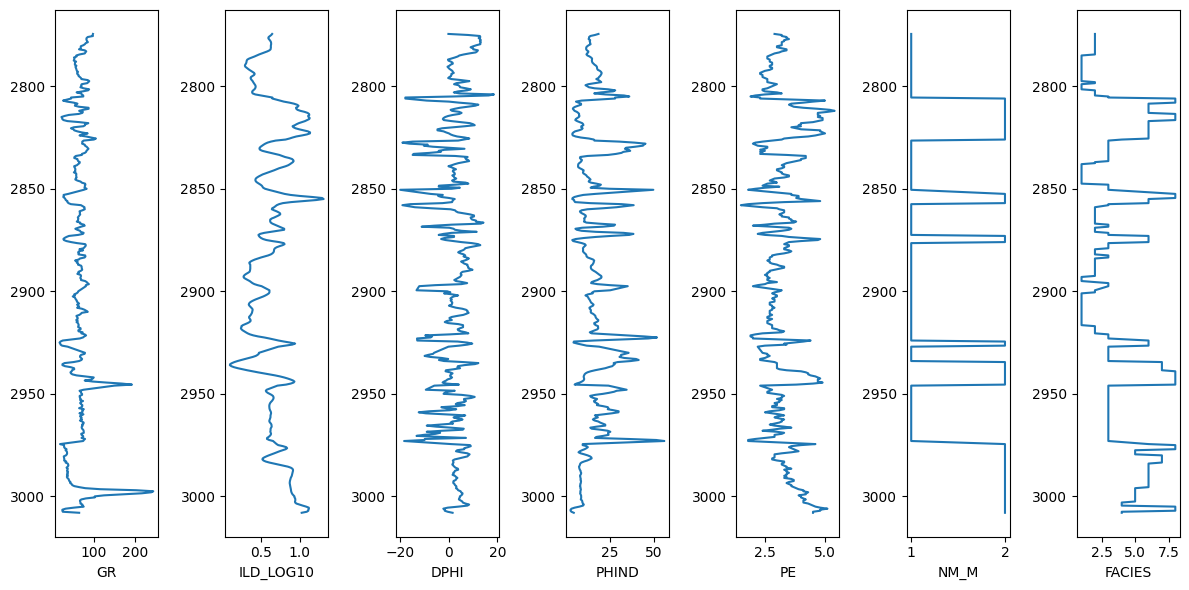

In [17]:
figure, ax = plt.subplots(nrows=1, ncols=7, figsize=(12,6))
logs = training_dataset[training_dataset['WELL'] == 'SHANKLE'].sort_values(by='DEPTH')
features = ['GR', 'ILD_LOG10', 'DPHI', 'PHIND', 'PE', 'NM_M', 'FACIES']
for i in range(len(features)):
  ax[i].plot(getattr(logs, features[i]), logs.DEPTH)
  ax[i].invert_yaxis()
  ax[i].set_xlabel(features[i])
plt.tight_layout()

<Axes: >

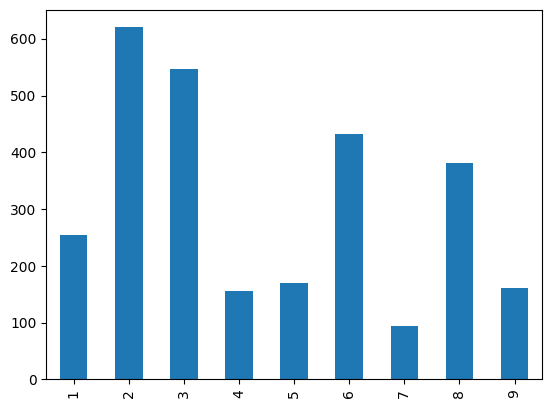

In [18]:
# display bar chart of facies counts in training dataset (excluding blind dataset)

facies_counts = training_dataset['FACIES'].value_counts().sort_index()
facies_counts.plot(kind='bar')

Pair plot for wireline data reading

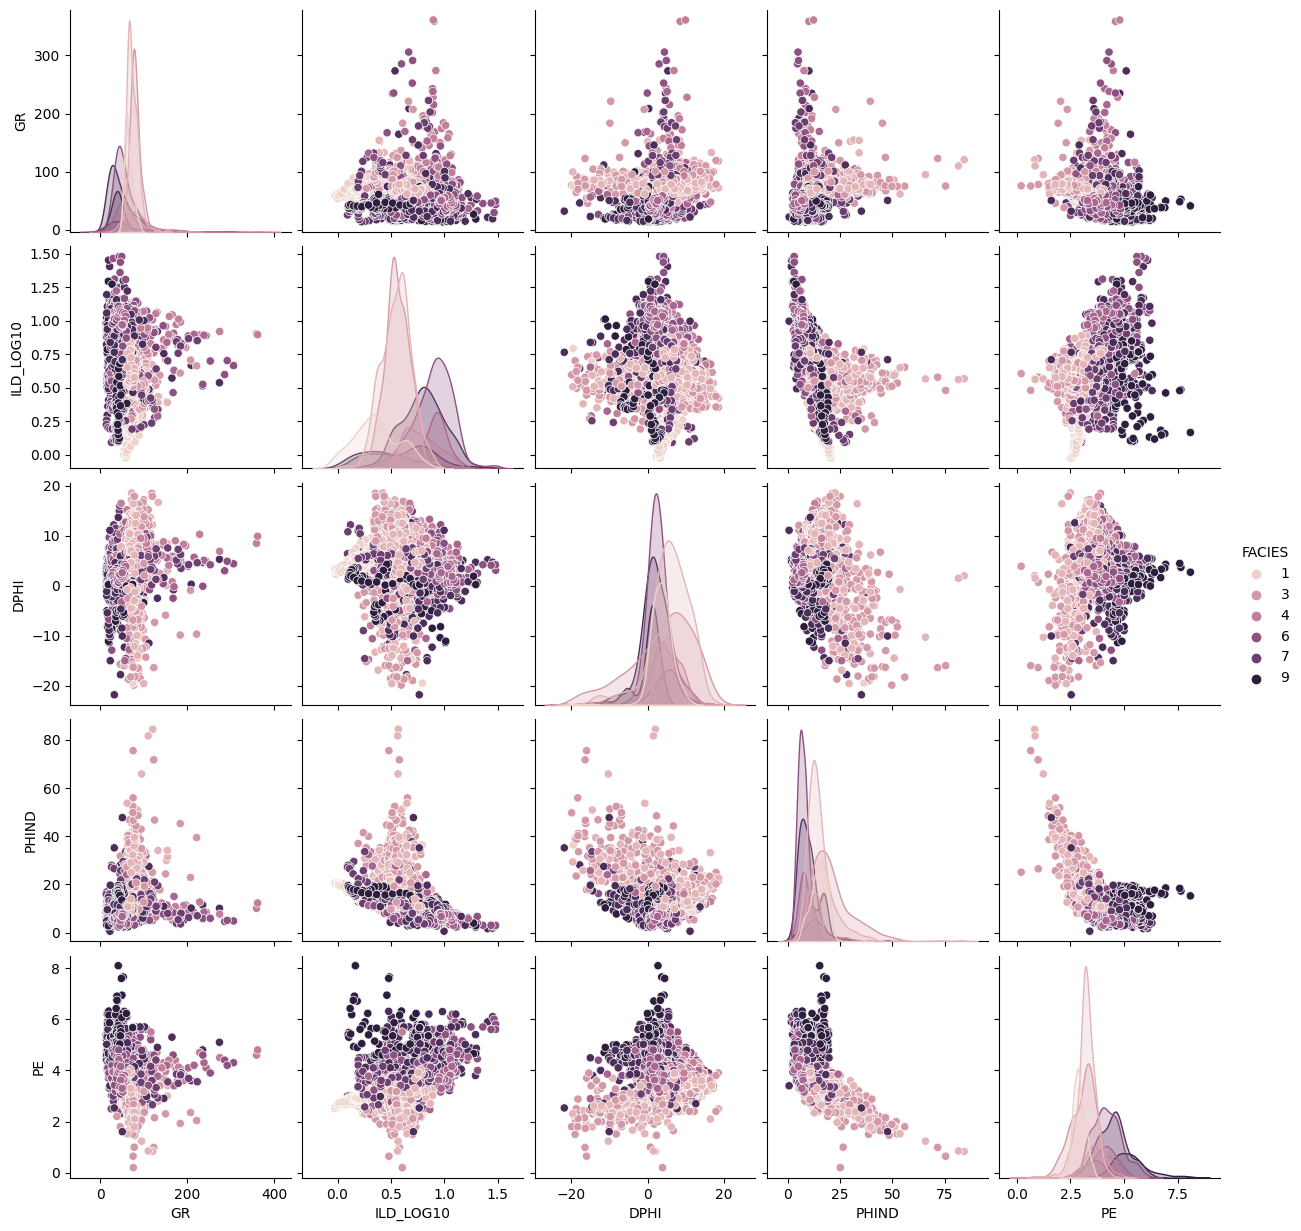

In [19]:
# display pairplot for based on facies category

dummy = training_dataset.drop(['WELL', 'FORMATION', 'DEPTH', 'RELPOS', 'NM_M'], axis=1)
sns.pairplot(dummy, hue='FACIES')

C:\Users\kemalrevian\AppData\Local\Temp\ipykernel_21720\3079807101.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(training_dataset.corr(), annot=True)


<Axes: >

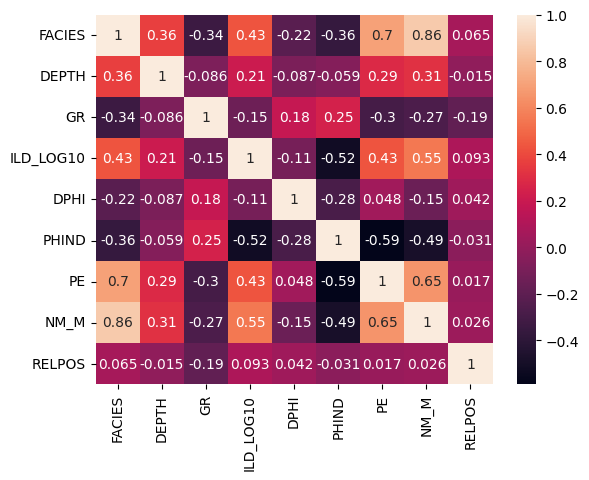

In [20]:
# display correlation matrix

sns.heatmap(training_dataset.corr(), annot=True)

Split into matrix feature and facies label

In [21]:
#With PE and NM_M
X = training_dataset.drop(['FORMATION', 'WELL', 'DEPTH', 'FACIES'], axis=1)
y = training_dataset['FACIES']

In [22]:
#With PE and NM_M
X.columns

Index(['GR', 'ILD_LOG10', 'DPHI', 'PHIND', 'PE', 'NM_M', 'RELPOS'], dtype='object')

Data splitting

In [23]:
#With PE and NM_M
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Standardization

In [24]:
#With PE and NM_M
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## K-nearest Neighbors

### Hyperparameter Tuning

`with PE and MN_M`

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_distributions = {'n_neighbors': np.arange(3, 15, 3),
                       'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), 
                           param_distributions, 
                           scoring='accuracy', cv=10)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  6,  9, 12]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [26]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [27]:
pd.DataFrame(grid_search.cv_results_).transpose()

,0,1,2,3,4,5,6,7
mean_fit_time,0.006447,0.0024,0.0008,0.0,0.0016,0.001599,0.00162,0.003011
std_fit_time,0.003224,0.003666,0.0024,0.0,0.0032,0.003197,0.00324,0.003729
mean_score_time,0.001599,0.001603,0.007197,0.004835,0.007205,0.003199,0.007202,0.003421
std_score_time,0.003199,0.003206,0.002399,0.003948,0.002402,0.003918,0.002401,0.003819
param_n_neighbors,3,3,6,6,9,9,12,12
param_weights,uniform,distance,uniform,distance,uniform,distance,uniform,distance
params,"{'n_neighbors': 3, 'weights': 'uniform'}","{'n_neighbors': 3, 'weights': 'distance'}","{'n_neighbors': 6, 'weights': 'uniform'}","{'n_neighbors': 6, 'weights': 'distance'}","{'n_neighbors': 9, 'weights': 'uniform'}","{'n_neighbors': 9, 'weights': 'distance'}","{'n_neighbors': 12, 'weights': 'uniform'}","{'n_neighbors': 12, 'weights': 'distance'}"
split0_test_score,0.68254,0.703704,0.645503,0.703704,0.671958,0.730159,0.661376,0.719577
split1_test_score,0.677249,0.714286,0.677249,0.730159,0.634921,0.666667,0.613757,0.661376
split2_test_score,0.767196,0.798942,0.714286,0.761905,0.687831,0.756614,0.671958,0.756614


### Model Evaluation on Test Set

In [28]:
knn = grid_search.best_estimator_
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

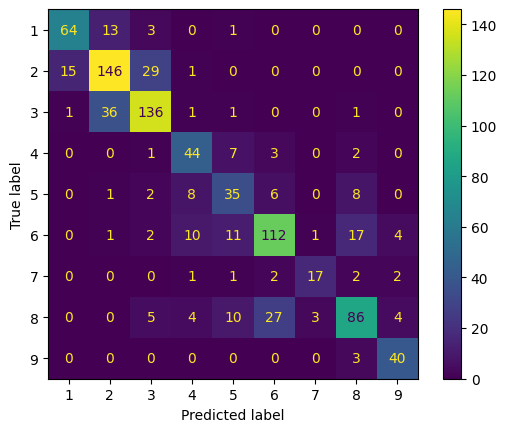

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_).plot()

In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.80      0.79      0.80        81
           2       0.74      0.76      0.75       191
           3       0.76      0.77      0.77       176
           4       0.64      0.77      0.70        57
           5       0.53      0.58      0.56        60
           6       0.75      0.71      0.73       158
           7       0.81      0.68      0.74        25
           8       0.72      0.62      0.67       139
           9       0.80      0.93      0.86        43

    accuracy                           0.73       930
   macro avg       0.73      0.74      0.73       930
weighted avg       0.73      0.73      0.73       930



blind

In [31]:
X = blind_dataset.drop(['FORMATION', 'WELL', 'DEPTH', 'FACIES',], axis=1)
y = blind_dataset['FACIES']

In [32]:
# standardization
X_blind_scaled = scaler.transform(X)

In [33]:
# predict on blind set
y_pred_blind = knn.predict(X_blind_scaled)

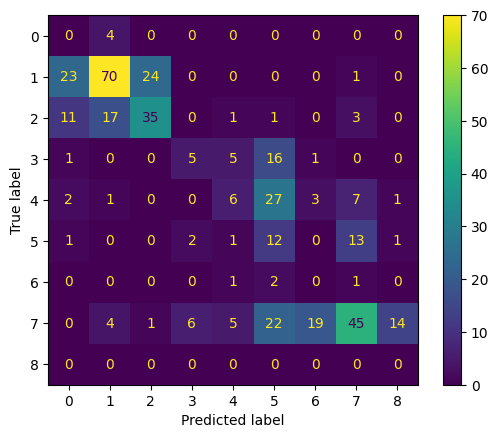

In [34]:
# confusion matrix
cm = confusion_matrix(y, y_pred_blind)
ConfusionMatrixDisplay(cm).plot()

In [35]:
print(classification_report(y, y_pred_blind))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.73      0.59      0.65       118
           3       0.58      0.51      0.55        68
           4       0.38      0.18      0.24        28
           5       0.32      0.13      0.18        47
           6       0.15      0.40      0.22        30
           7       0.00      0.00      0.00         4
           8       0.64      0.39      0.48       116
           9       0.00      0.00      0.00         0

    accuracy                           0.42       415
   macro avg       0.31      0.24      0.26       415
weighted avg       0.56      0.42      0.46       415



c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest Classifier

### Hyperparameter Tuning

In [36]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint as sp_randint
# from sklearn.ensemble import RandomForestClassifier

# param_distributions = {'n_estimators': sp_randint(100, 500),
#                        'max_depth': sp_randint(3, 7),
#                        'max_features': sp_randint(1, 7)}
# search = RandomizedSearchCV(RandomForestClassifier(), 
#                            param_distributions, 
#                            scoring='accuracy', cv=10)
# search.fit(X_train_scaled, y_train)

In [37]:
# search.best_params_

In [38]:
# pd.DataFrame(search.cv_results_).transpose()

### Model Evaluation on Test Set

In [39]:
# rf = search.best_estimator_
# rf.fit(X_train_scaled, y_train)
# y_pred = rf.predict(X_test_scaled)

In [40]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import ConfusionMatrixDisplay

# cm = confusion_matrix(y_test, y_pred)
# ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_).plot()

In [41]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred))

## Support Vector Machine

### Hyperparameter Tuning

`With PE and MN_M`

In [42]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_distributions = {'C': [1, 5, 10],
                       'kernel': ('linear', 'rbf'),
                       'gamma' : ('scale', 'auto')}

grid_search = GridSearchCV(SVC(),
                           param_grid=param_distributions,
                           scoring='accuracy',
                           cv=10)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 10], 'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf')},
             scoring='accuracy')

In [43]:
grid_search.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [44]:
pd.DataFrame(grid_search.cv_results_).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
mean_fit_time,0.0633,0.079204,0.055201,0.065601,0.099204,0.084027,0.140277,0.077721,0.177903,0.080132,0.171736,0.069739
std_fit_time,0.021267,0.006639,0.005604,0.003201,0.005302,0.013495,0.015903,0.007155,0.016734,0.005032,0.028201,0.005115
mean_score_time,0.009601,0.029596,0.007999,0.025599,0.007199,0.03043,0.008826,0.026491,0.009643,0.027223,0.008825,0.024082
std_score_time,0.003191,0.005122,0.000014,0.00319,0.0024,0.006952,0.002393,0.003652,0.004835,0.003912,0.005596,0.000111
param_C,1,1,1,1,5,5,5,5,10,10,10,10
param_gamma,scale,scale,auto,auto,scale,scale,auto,auto,scale,scale,auto,auto
param_kernel,linear,rbf,linear,rbf,linear,rbf,linear,rbf,linear,rbf,linear,rbf
params,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}","{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}","{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}","{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}","{'C': 5, 'gamma': 'scale', 'kernel': 'linear'}","{'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}","{'C': 5, 'gamma': 'auto', 'kernel': 'linear'}","{'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}","{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}","{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}","{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}","{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}"
split0_test_score,0.560847,0.677249,0.560847,0.677249,0.571429,0.693122,0.571429,0.693122,0.571429,0.68254,0.571429,0.68254
split1_test_score,0.544974,0.613757,0.544974,0.613757,0.544974,0.571429,0.544974,0.566138,0.555556,0.582011,0.555556,0.587302


In [45]:
model = grid_search.best_estimator_
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

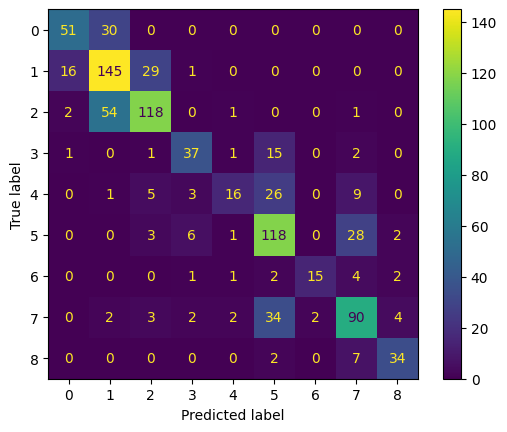

In [46]:
# confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.63      0.68        81
           2       0.62      0.76      0.69       191
           3       0.74      0.67      0.70       176
           4       0.74      0.65      0.69        57
           5       0.73      0.27      0.39        60
           6       0.60      0.75      0.66       158
           7       0.88      0.60      0.71        25
           8       0.64      0.65      0.64       139
           9       0.81      0.79      0.80        43

    accuracy                           0.67       930
   macro avg       0.72      0.64      0.66       930
weighted avg       0.68      0.67      0.67       930



## Evaluation on Blind Set

In [48]:
# create feature and target matrix from blind dataset
X = blind_dataset.drop(['FORMATION', 'WELL', 'DEPTH', 'FACIES',], axis=1)
y = blind_dataset['FACIES']

In [49]:
# standardization
X_blind_scaled = scaler.transform(X)

In [50]:
# predict on blind set
y_pred_blind = model.predict(X_blind_scaled)

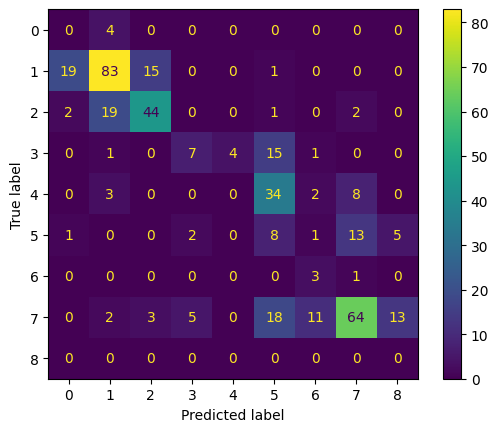

In [51]:
# confusion matrix
cm = confusion_matrix(y, y_pred_blind)
ConfusionMatrixDisplay(cm).plot()

In [52]:
# classification report
print(classification_report(y, y_pred_blind))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.74      0.70      0.72       118
           3       0.71      0.65      0.68        68
           4       0.50      0.25      0.33        28
           5       0.00      0.00      0.00        47
           6       0.10      0.27      0.15        30
           7       0.17      0.75      0.27         4
           8       0.73      0.55      0.63       116
           9       0.00      0.00      0.00         0

    accuracy                           0.50       415
   macro avg       0.33      0.35      0.31       415
weighted avg       0.57      0.50      0.53       415



c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


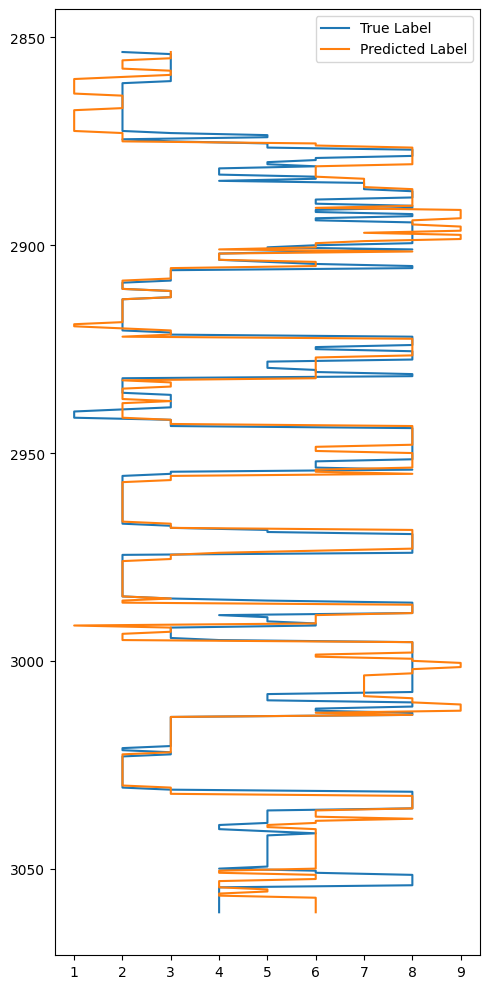

In [53]:
# compare actual facies with model
figure, ax = plt.subplots(figsize=(5,10))
logs = blind_dataset[blind_dataset['WELL'] == 'NOLAN'].sort_values(by='DEPTH')
ax.plot(logs.FACIES, logs.DEPTH, label='True Label')
ax.plot(y_pred_blind, logs.DEPTH, label='Predicted Label')
ax.invert_yaxis()
# ax.set_xlabel(features[i])
plt.tight_layout()
plt.legend()

Description of 9 discrete facies
1. **(SS)** Nonmarine sandstone
2. **(CSiS)** Nonmarine coarse siltstone
3. **(FSiS)** Nonmarine fine siltstone
4. **(SiSH)** Marine siltstone and shale
5. **(MS)** Mudstone (limestone)
6. **(WS)** Wackestone (limestone)
7. **(D)** Dolomite
8. **(PS)** Packstone-grainstone (limestone)
9. **(BS)** Phylloid-algal bafflestone (limestone)

In [54]:
#Without PE and NM_M
X1 = training_dataset.drop(['FORMATION', 'WELL', 'DEPTH', 'FACIES','PE','NM_M'], axis=1)
y1 = training_dataset['FACIES']

In [55]:
#Without PE and NM_M
X1.columns

Index(['GR', 'ILD_LOG10', 'DPHI', 'PHIND', 'RELPOS'], dtype='object')

In [56]:
#Without PE and NM_M
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.33)

In [57]:
#Without PE and NM_M
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train1)
X_train_scaled1 = scaler.transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

## K-nearest Neighbors

### Hyperparameter Tuning

`Without PE and MN_M`

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_distributions = {'n_neighbors': np.arange(3, 15, 3),
                       'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNeighborsClassifier(), 
                           param_distributions, 
                           scoring='accuracy', cv=10)
grid_search.fit(X_train_scaled1, y_train1)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  6,  9, 12]),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [59]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'distance'}

In [60]:
knn1 = grid_search.best_estimator_
knn1.fit(X_train_scaled1, y_train1)
y_pred1 = knn1.predict(X_test_scaled1)

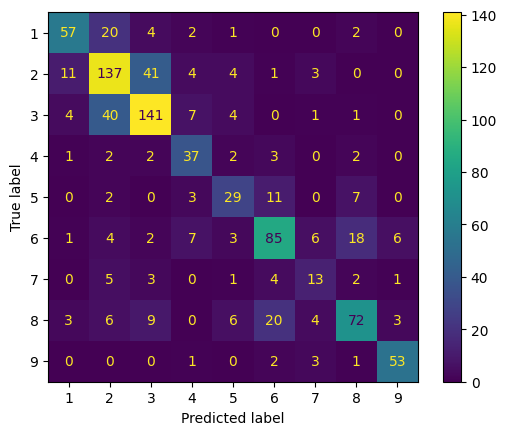

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test1, y_pred1)
ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=knn1.classes_).plot()

In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           1       0.74      0.66      0.70        86
           2       0.63      0.68      0.66       201
           3       0.70      0.71      0.70       198
           4       0.61      0.76      0.67        49
           5       0.58      0.56      0.57        52
           6       0.67      0.64      0.66       132
           7       0.43      0.45      0.44        29
           8       0.69      0.59      0.63       123
           9       0.84      0.88      0.86        60

    accuracy                           0.67       930
   macro avg       0.65      0.66      0.66       930
weighted avg       0.67      0.67      0.67       930



blind

In [63]:
X = blind_dataset.drop(['FORMATION', 'WELL', 'DEPTH', 'FACIES','PE','NM_M'], axis=1)
y = blind_dataset['FACIES']

In [64]:
X_blind_scaled = scaler.transform(X)

In [65]:
y_pred_blind = knn1.predict(X_blind_scaled)

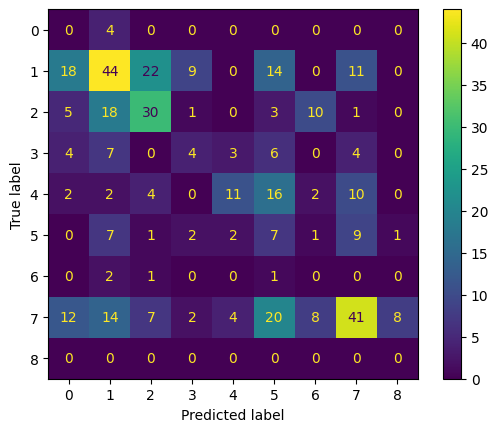

In [66]:
cm = confusion_matrix(y, y_pred_blind)
ConfusionMatrixDisplay(cm).plot()

In [67]:
print(classification_report(y, y_pred_blind))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.45      0.37      0.41       118
           3       0.46      0.44      0.45        68
           4       0.22      0.14      0.17        28
           5       0.55      0.23      0.33        47
           6       0.10      0.23      0.14        30
           7       0.00      0.00      0.00         4
           8       0.54      0.35      0.43       116
           9       0.00      0.00      0.00         0

    accuracy                           0.33       415
   macro avg       0.26      0.20      0.21       415
weighted avg       0.44      0.33      0.37       415



c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Support Vector Machine

### Hyperparameter Tuning

`Without PE and MN_M`

In [68]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_distributions = {'C': [1, 5, 10],
                       'kernel': ('linear', 'rbf'),
                       'gamma' : ('scale', 'auto')}

grid_search = GridSearchCV(SVC(),
                           param_grid=param_distributions,
                           scoring='accuracy',
                           cv=10)
grid_search.fit(X_train_scaled1, y_train1)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 5, 10], 'gamma': ('scale', 'auto'),
                         'kernel': ('linear', 'rbf')},
             scoring='accuracy')

In [69]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [70]:
model1 = grid_search.best_estimator_
model1.fit(X_train_scaled1, y_train1)
y_pred1 = model1.predict(X_test_scaled1)

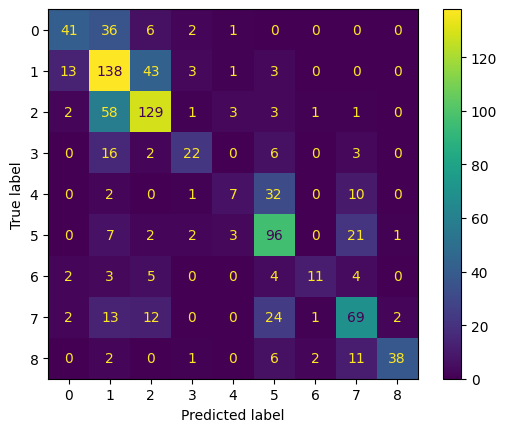

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test1, y_pred1)
ConfusionMatrixDisplay(cm1).plot()

In [72]:
from sklearn.metrics import classification_report

print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           1       0.68      0.48      0.56        86
           2       0.50      0.69      0.58       201
           3       0.65      0.65      0.65       198
           4       0.69      0.45      0.54        49
           5       0.47      0.13      0.21        52
           6       0.55      0.73      0.63       132
           7       0.73      0.38      0.50        29
           8       0.58      0.56      0.57       123
           9       0.93      0.63      0.75        60

    accuracy                           0.59       930
   macro avg       0.64      0.52      0.55       930
weighted avg       0.61      0.59      0.58       930



## Evaluation on Blind Set

In [73]:
# create feature and target matrix from blind dataset
X = blind_dataset.drop(['FORMATION', 'WELL', 'DEPTH', 'FACIES','PE','NM_M'], axis=1)
y = blind_dataset['FACIES']

In [74]:
# standardization
X_blind_scaled = scaler.transform(X)

In [76]:
# predict on blind set
y_pred_blind = model1.predict(X_blind_scaled)

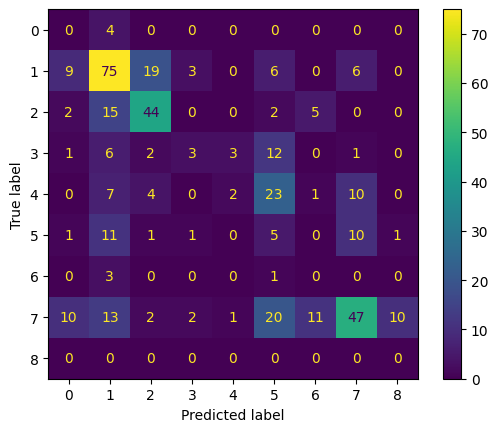

In [77]:
# confusion matrix
cm = confusion_matrix(y, y_pred_blind)
ConfusionMatrixDisplay(cm).plot()

In [79]:
# classification report

print(classification_report(y, y_pred_blind))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         4
           2       0.56      0.64      0.60       118
           3       0.61      0.65      0.63        68
           4       0.33      0.11      0.16        28
           5       0.33      0.04      0.08        47
           6       0.07      0.17      0.10        30
           7       0.00      0.00      0.00         4
           8       0.64      0.41      0.49       116
           9       0.00      0.00      0.00         0

    accuracy                           0.42       415
   macro avg       0.28      0.22      0.23       415
weighted avg       0.50      0.42      0.44       415



c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


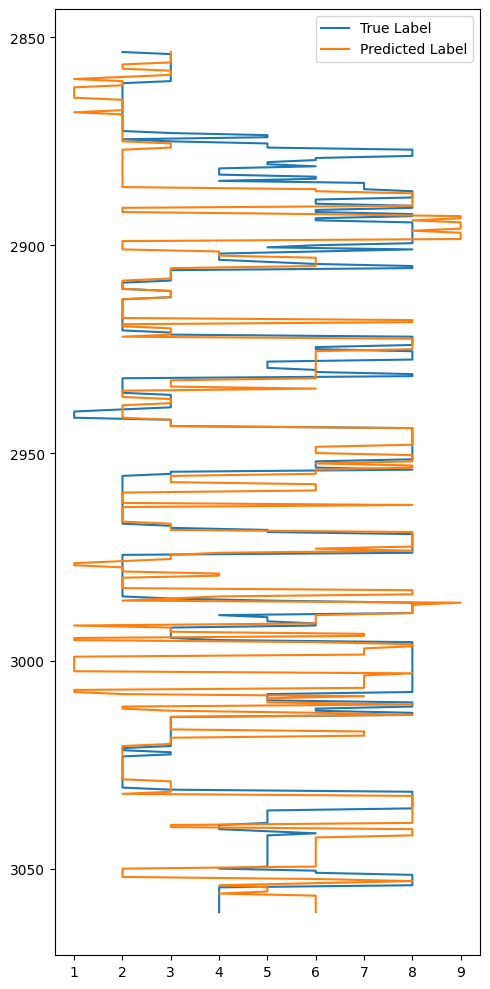

In [80]:
# compare actual facies with model
figure, ax = plt.subplots(figsize=(5,10))
logs = blind_dataset[blind_dataset['WELL'] == 'NOLAN'].sort_values(by='DEPTH')
ax.plot(logs.FACIES, logs.DEPTH, label='True Label')
ax.plot(y_pred_blind, logs.DEPTH, label='Predicted Label')
ax.invert_yaxis()
# ax.set_xlabel(features[i])
plt.tight_layout()
plt.legend()

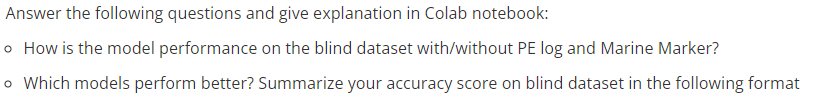

Perbedaan performance pada blind dataset with/without PE log dan Marine Marker yaitu, jika menggunakan PE log dan Marine Marker nilai accuracy blind dataset akan lebih besar daripada tanpa menggunakan PE log dan Marine Marker

In [81]:
data = {'Model' :["K-nearest Neighbors", "Support Vector Machine" ],
    'Accuracy Score (with PE Log and Marine Marker)': ["0.74", "0.67"],
    'Accuracy Score (without PE Log and Marine Marker)':["0.69", "0.61"]
}
df = pd.DataFrame(data)
df

,Model,Accuracy Score (with PE Log and Marine Marker),Accuracy Score (without PE Log and Marine Marker)
0,K-nearest Neighbors,0.74,0.69
1,Support Vector Machine,0.67,0.61


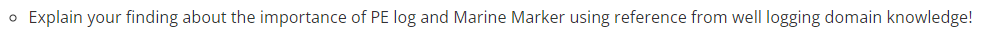

PE log :
- PE log mengukur porositas efektif dari formasi geologi. 
- PE log membantu dalam identifikasi dan karakterisasi reservoir hidrokarbon dengan menunjukkan tingkat porositas efektif dari formasi geologi. Informasi ini penting dalam menentukan kemampuan formasi untuk menyimpan dan mengalirkan hidrokarbon.

Marine Marker:

- Marine Marker dapat memberikan informasi tentang lingkungan pengendapan, kondisi oseanografi, dan perubahan geologis yang terjadi selama proses pengendapan sedimen laut.
- Dalam domain well logging, Marine Marker dapat digunakan untuk memahami kualitas dan karakteristik formasi geologi yang terkait dengan lingkungan maritim. Informasi ini dapat membantu dalam penilaian kualitas reservoir, identifikasi sumber daya hidrokarbon, dan pemodelan interpretasi geologi regional.

Keduanya berperan dalam karakterisasi dan penilaian formasi geologi, serta membantu dalam pengambilan keputusan yang berkaitan dengan eksplorasi dan produksi hidrokarbon. Oleh karena itu, kehadiran dan pemodelan yang tepat dari PE log dan Marine Marker dapat berkontribusi pada peningkatan pemahaman dan prediksi mengenai formasi geologi dan potensi reservoir.
